In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
weather = pd.read_csv('../data_original/bna_weather.csv')

In [3]:
weather.head()

,STATION,NAME,DATE,AWND,PGTM,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5,WT01,WT02,WT03,WT08
0,USW00013897,"NASHVILLE INTERNATIONAL AIRPORT, TN US",2023-08-01,6.49,NaN,0.00,0.0,0.0,80,89,70,50,10,13.0,21.0,NaN,NaN,NaN,NaN
1,USW00013897,"NASHVILLE INTERNATIONAL AIRPORT, TN US",2023-08-02,2.91,NaN,0.00,0.0,0.0,77,86,65,150,180,8.1,12.1,NaN,NaN,NaN,NaN
2,USW00013897,"NASHVILLE INTERNATIONAL AIRPORT, TN US",2023-08-03,4.92,NaN,1.19,0.0,0.0,77,81,72,230,300,12.1,29.1,1.0,NaN,1.0,NaN
3,USW00013897,"NASHVILLE INTERNATIONAL AIRPORT, TN US",2023-08-04,2.24,NaN,0.12,0.0,0.0,78,84,73,270,40,8.9,14.1,1.0,NaN,NaN,NaN
4,USW00013897,"NASHVILLE INTERNATIONAL AIRPORT, TN US",2023-08-05,3.58,NaN,0.14,0.0,0.0,77,87,72,170,160,18.1,25.9,1.0,NaN,1.0,NaN


Daily weather from airport station.
DATE column - join to bus data.
TAVG, TMIN, TMAX - relate to temp (daily average, low, high)
PRCP - rain?
AWND - average wind speed?

In [4]:
weather_trim = weather[['DATE', 'AWND', 'PRCP', 'TAVG', 'TMAX', 'TMIN']]

In [5]:
bus = pd.read_csv('../data/complete_scheduled_trips')

In [6]:
bus_weather = pd.merge(bus, weather_trim, on = 'DATE', how = 'left')

In [7]:
weather['PRCP'].value_counts().sort_index()

0.00    43
0.03     1
0.05     1
0.06     1
0.11     1
0.12     1
0.13     1
0.14     1
0.16     2
0.17     1
0.19     1
0.23     1
0.30     2
0.69     1
0.74     1
0.84     1
1.19     1
Name: PRCP, dtype: int64

Only one day had more than an inch of rain (1.19) and 3 others were above 0.5 (0.69, 0.74, 0.84). 43 days had no rain at all.

Initial EDA: categorize days by higher rainfall (nothing, very little, over 0.5 inch, over an inch) and make a plot to look at comparisons. Probably relplot() with routes and rain cat as rows and columns.

In [8]:
# rain category column added
bus_weather['rain_category'] = ['None' if x == 0 else 'Over 1"' if x > 1 else '0.5 - 1"' if 0.5 < x < 1 else ' Under 0.5"' for x in bus_weather['PRCP']]

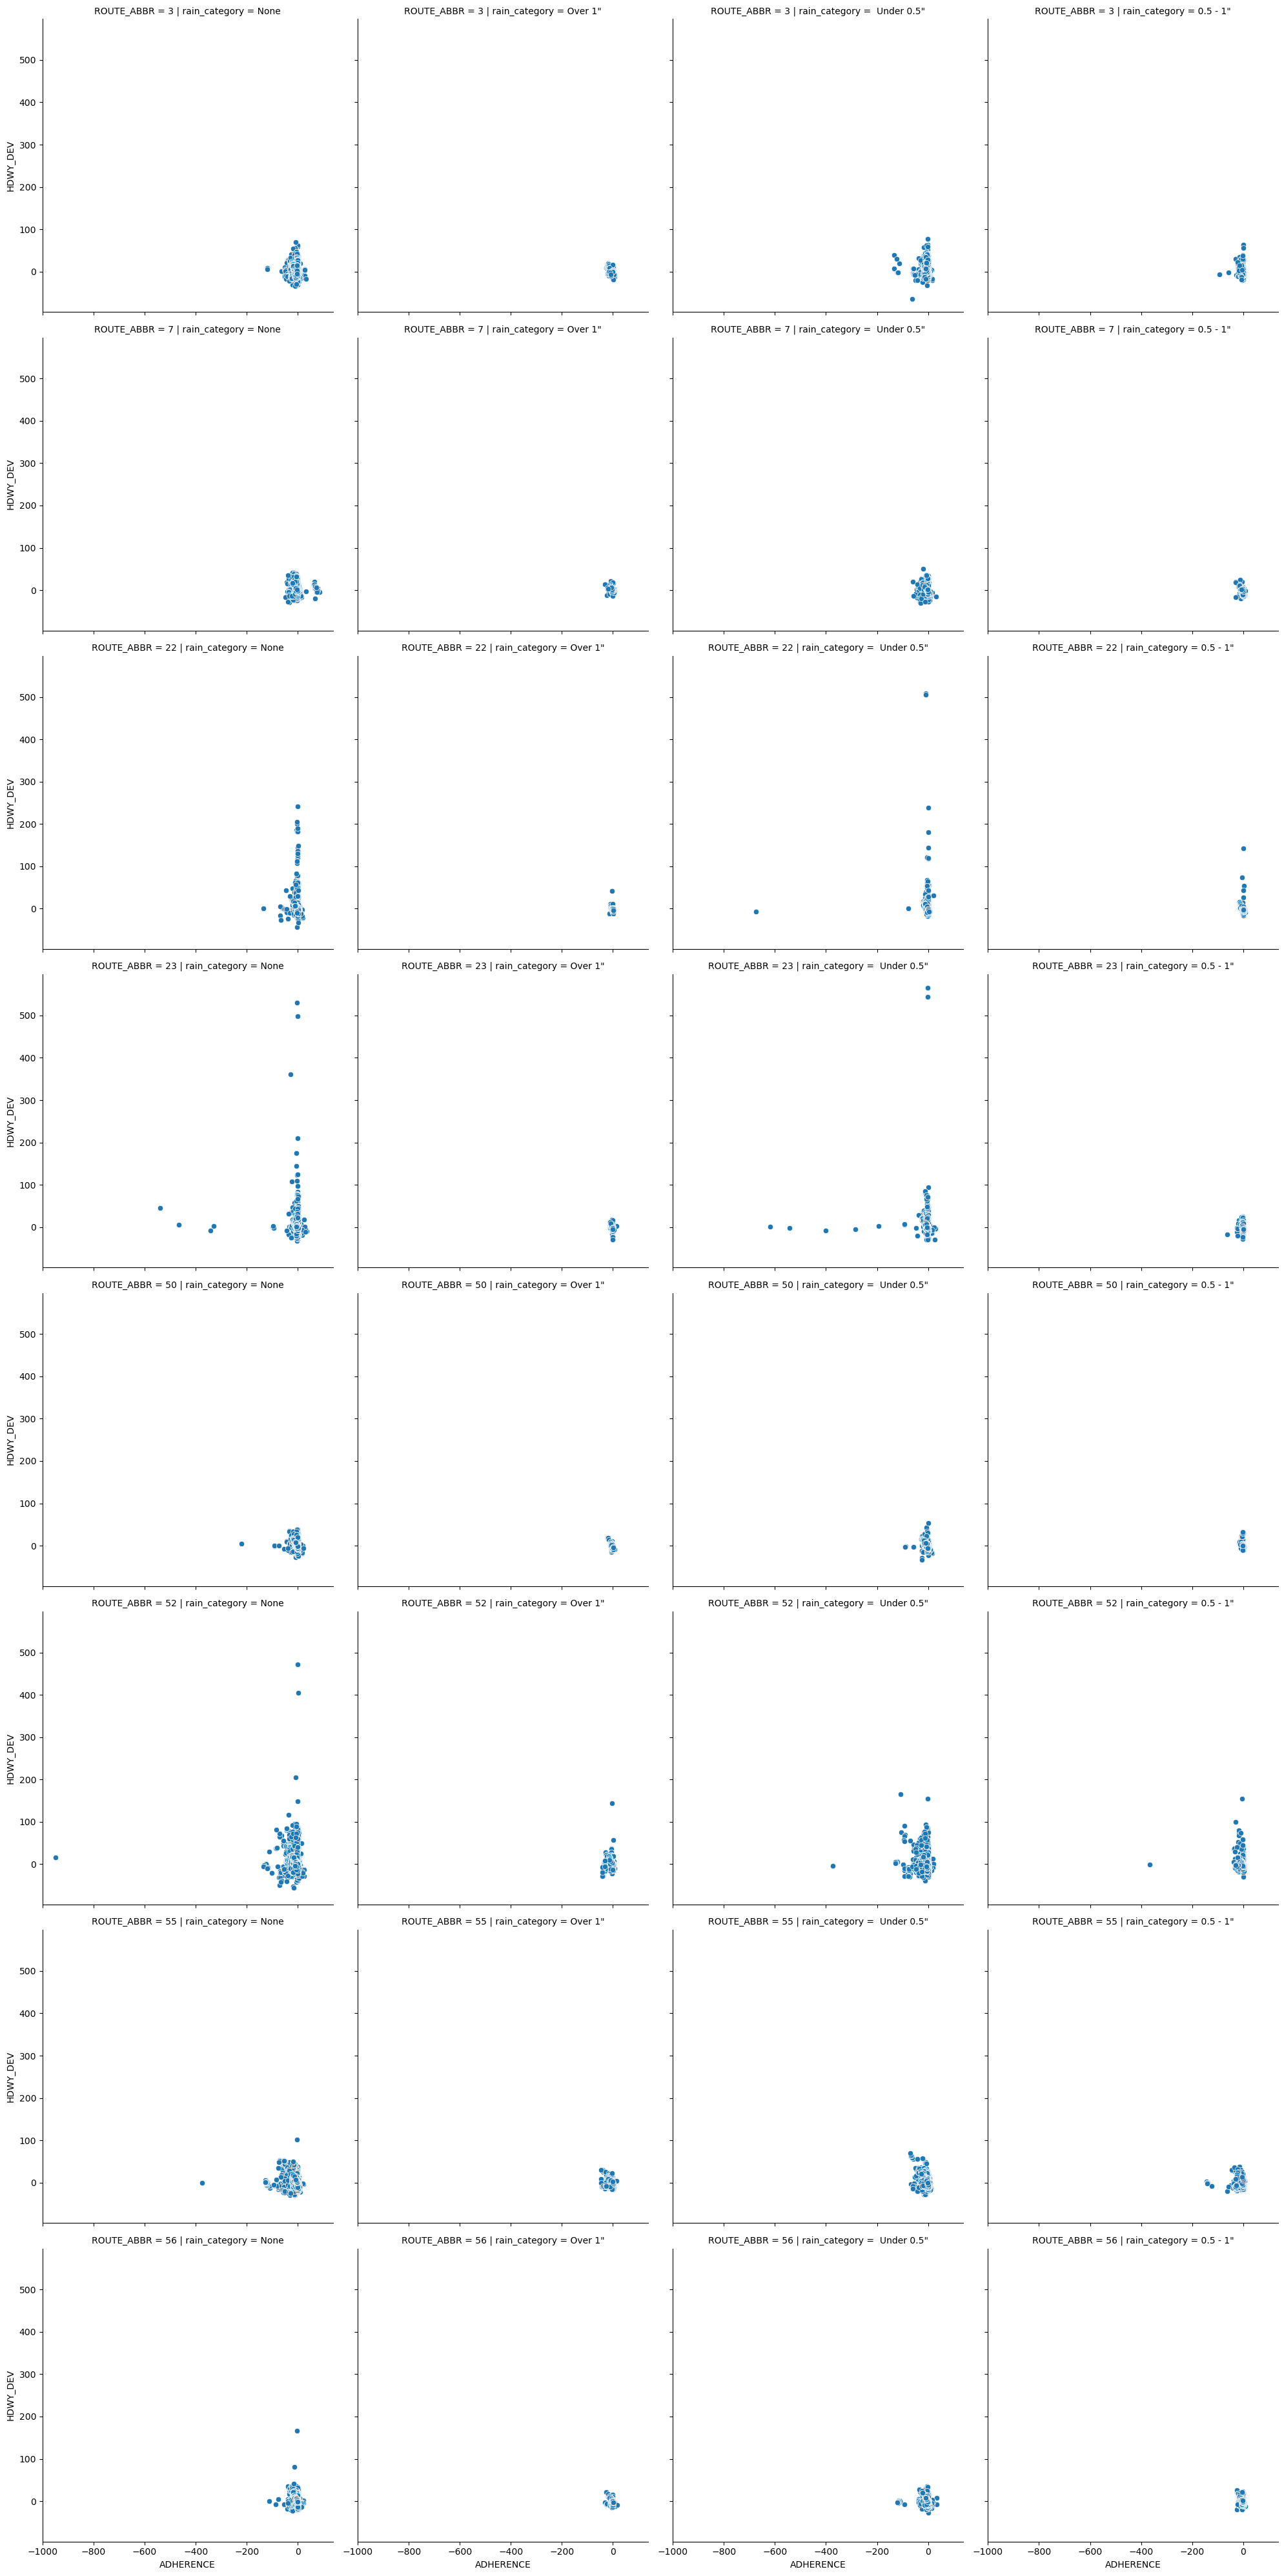

In [9]:
sns.relplot(data = bus_weather, x = 'ADHERENCE', y = 'HDWY_DEV', kind = 'scatter', col = 'rain_category', row = 'ROUTE_ABBR')

Interestingly, the day with rainfall over 1" shows the least variation in both headway deviation and adherance (in a good way) for all routes. What day of the week was this?

In [10]:
bus_weather.loc[bus_weather['rain_category'] == 'Over 1"']

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,DWELL_IN_MINS,trip_date,weekday,day_name,AWND,PRCP,TAVG,TMAX,TMIN,rain_category
12868,120230803,1,99525645,2023-08-03,22,2200,1040,345104,0,TO DOWNTOWN,...,38.116666,345104120230803,3,Thursday,4.92,1.19,77,81,72,"Over 1"""
12869,120230803,1,99525646,2023-08-03,22,2200,1040,345104,0,TO DOWNTOWN,...,0.000000,345104120230803,3,Thursday,4.92,1.19,77,81,72,"Over 1"""
12870,120230803,1,99525647,2023-08-03,22,2200,1040,345104,0,TO DOWNTOWN,...,0.000000,345104120230803,3,Thursday,4.92,1.19,77,81,72,"Over 1"""
12871,120230803,1,99525648,2023-08-03,22,2200,1040,345104,0,TO DOWNTOWN,...,0.000000,345104120230803,3,Thursday,4.92,1.19,77,81,72,"Over 1"""
12872,120230803,1,99525649,2023-08-03,22,2200,1040,345105,0,FROM DOWNTOWN,...,12.633333,345105120230803,3,Thursday,4.92,1.19,77,81,72,"Over 1"""
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19297,120230803,1,99533719,2023-08-03,7,706,2978,348669,0,TO DOWNTOWN,...,0.000000,348669120230803,3,Thursday,4.92,1.19,77,81,72,"Over 1"""
19298,120230803,1,99533720,2023-08-03,7,706,2978,348669,0,TO DOWNTOWN,...,0.000000,348669120230803,3,Thursday,4.92,1.19,77,81,72,"Over 1"""
19299,120230803,1,99533721,2023-08-03,7,706,2978,348670,0,FROM DOWNTOWN,...,0.000000,348670120230803,3,Thursday,4.92,1.19,77,81,72,"Over 1"""
19300,120230803,1,99533722,2023-08-03,7,706,2978,348670,0,FROM DOWNTOWN,...,0.000000,348670120230803,3,Thursday,4.92,1.19,77,81,72,"Over 1"""


Heaviest rainfall was on a Thursday. Visually, Thursday is not the day with the least headway deviation or lateness for any route.

Try plotting rainfall amount against headway deviation and adherance separately.

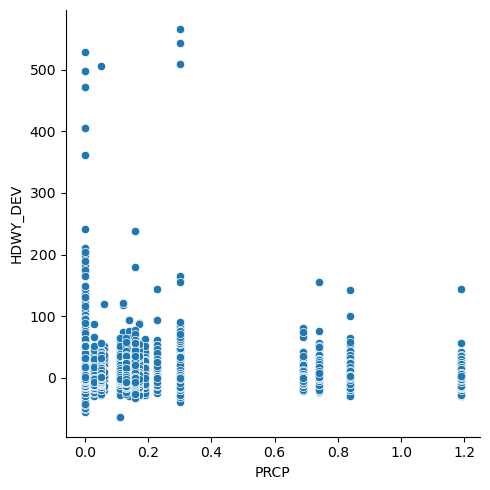

In [12]:
sns.relplot(data = bus_weather, x = 'PRCP', y = 'HDWY_DEV', kind = 'scatter')

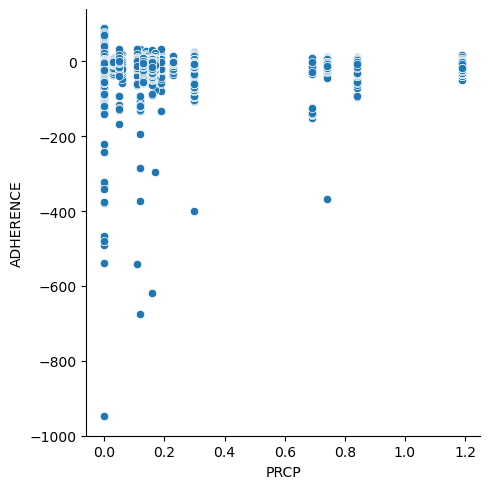

In [14]:
sns.relplot(data = bus_weather, x = 'PRCP', y = 'ADHERENCE', kind = 'scatter')

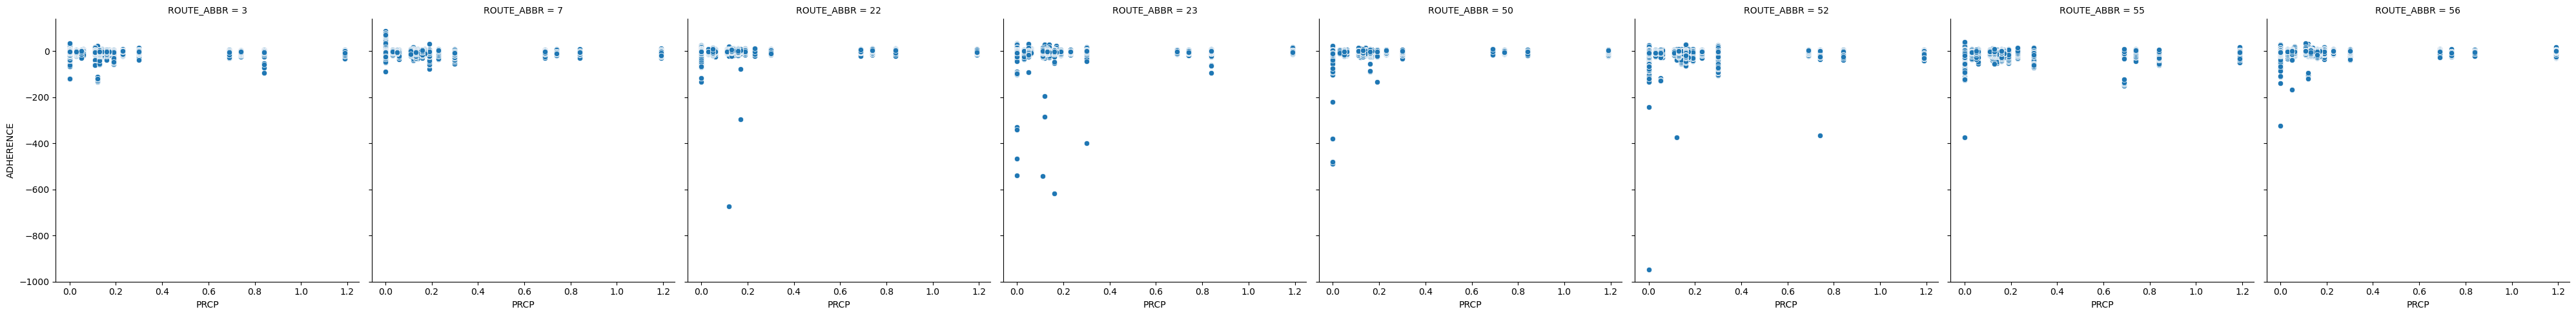

In [17]:
sns.relplot(data = bus_weather, x = 'PRCP', y = 'ADHERENCE', kind = 'scatter', col = 'ROUTE_ABBR')
# not useful to break down by day as well since there are so few rain days

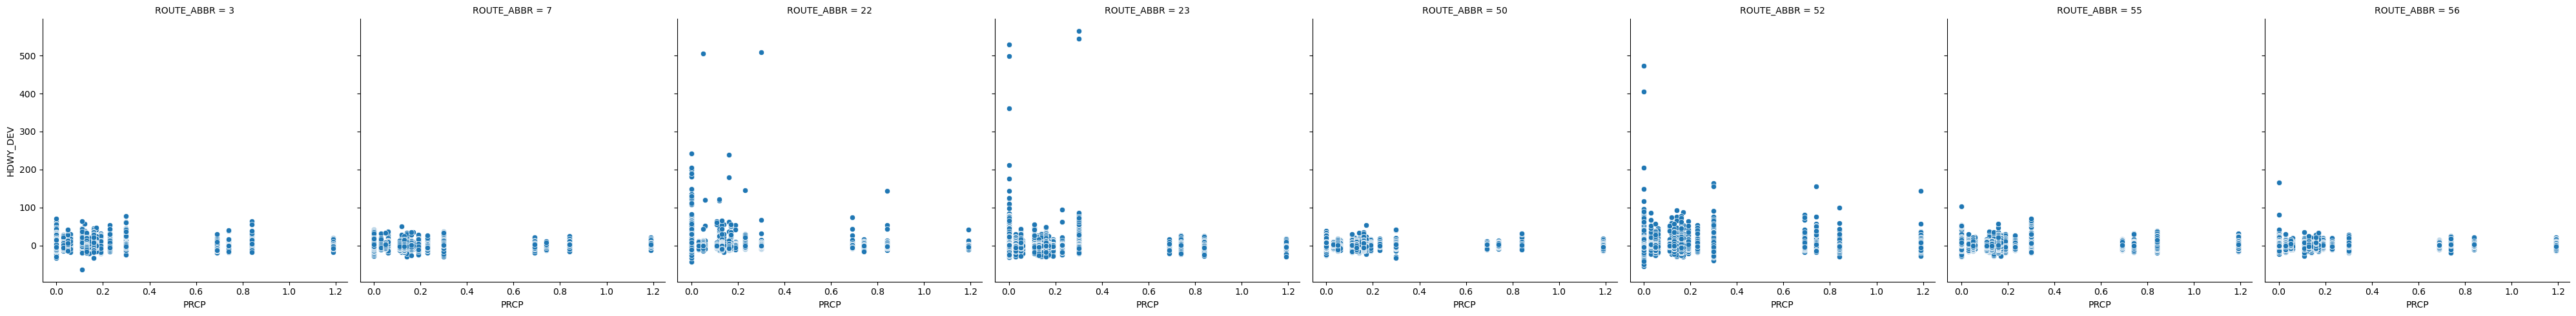

In [19]:
sns.relplot(data = bus_weather, x = 'PRCP', y = 'HDWY_DEV', kind = 'scatter', col = 'ROUTE_ABBR')

The counter-intuitive conclusion is that rain improves on-time performance and headway deviation. The extreme headway deviation outliers (where some stops are apparently skipped repeatedly but look into this more) do not appear on heavier rainfall days. To really prove this out, we would need more data. With only 4 days over 0.5" and just one over 1" there's not enough to really draw conclusions.

I don't expect temp to have any effect, but try the plots anyway.

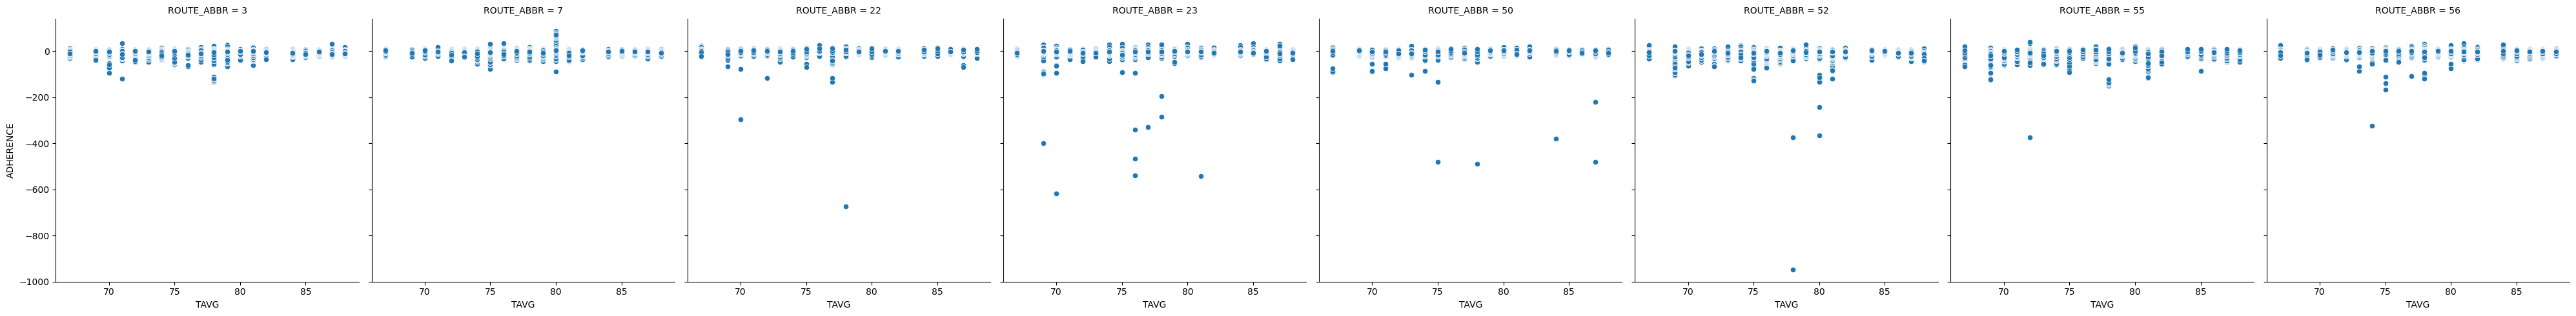

In [20]:
sns.relplot(data = bus_weather, x = 'TAVG', y = 'ADHERENCE', kind = 'scatter', col = 'ROUTE_ABBR')

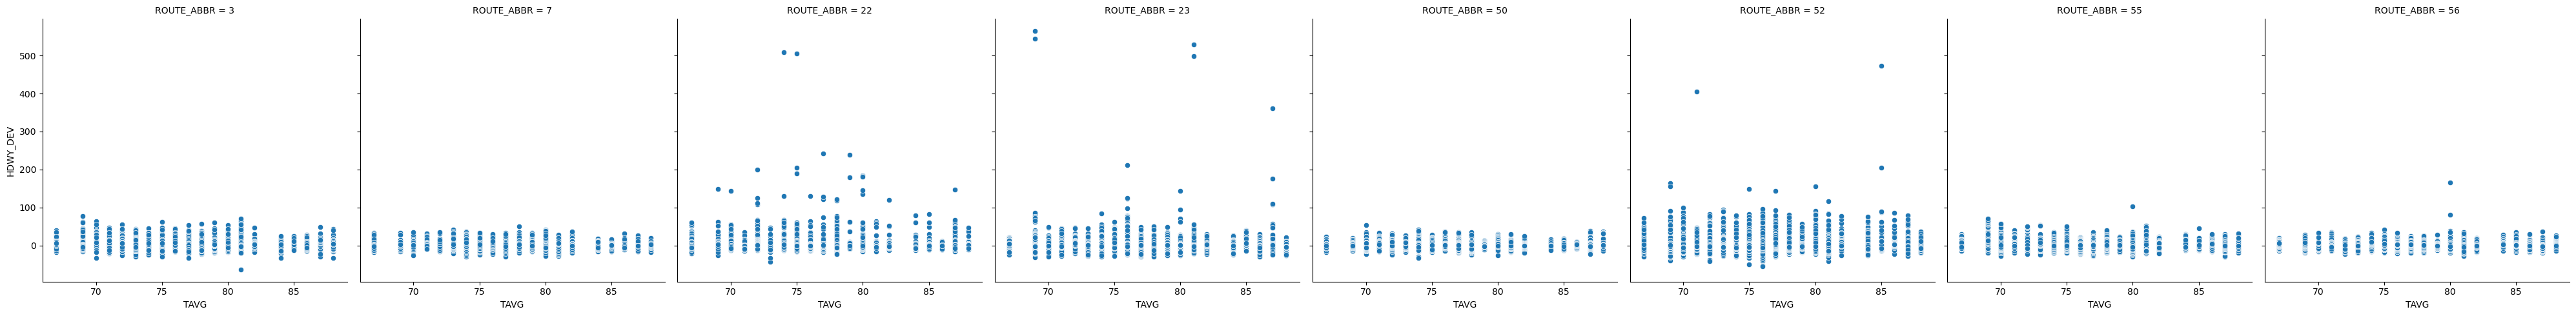

In [21]:
sns.relplot(data = bus_weather, x = 'TAVG', y = 'HDWY_DEV', kind = 'scatter', col = 'ROUTE_ABBR')

Temperature also seems to have no effect on performance, however there were no extreme temperature days during the timespan of this data. We would need to have a longer timeframe, preferably including both extreme summer and extreme winter weather, to really make any determinations. The route itself is much more determinative in performance.